# physics760 - Problem Set 3

In [78]:
# Standard imports for computation physics
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import typing
import scienceplots

# Pretty styling for graphs
plt.style.use(['science', 'grid', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

# 3.2 Evolution of the Sample Average

In [79]:
def laplace(x: float) -> float:
    return np.exp(-np.abs(x)) / 2

rng = np.random.default_rng()
samples = rng.laplace(size=(1000, 2**11))

<font color="blue"> **Q. For a single experiment make a histogram of all the samples $x$ and compare it to $L_{0,1}$.**</font>

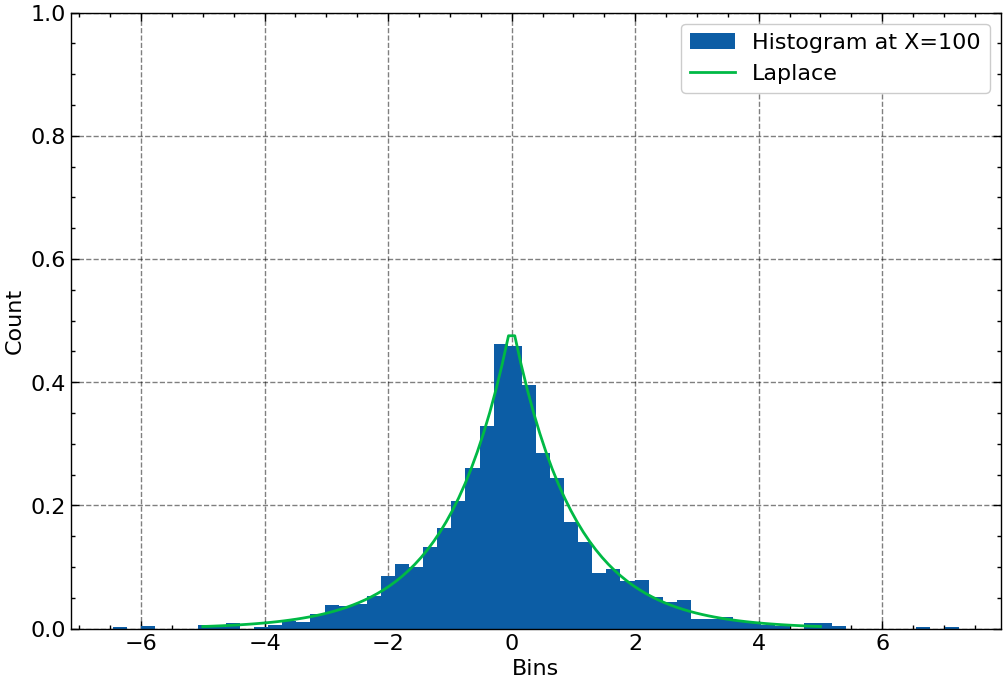

In [80]:
laplace_sampling = np.linspace(-5, 5, num=100)

fig, ax = plt.subplots()
ax.hist(samples[100], bins=60, density=True, label=f'Histogram at X={100}')

ax.plot(laplace_sampling, laplace(laplace_sampling), label=f'Laplace')
ax.set_ylim([0, 1]);

ax.set_xlabel('Bins')
ax.set_ylabel('Count')
ax.legend()

<font color="blue"> **Q. For $20$ of the experiments plot $S_t$ as a function of time $t$. t runs from $1$ (the beginning of the experiment where the sample average for any experiment is the one lonely sample in the experiment ‘so far’) all the way to $T$ (the end of the experiment). You can plot them all on the same plot, or present them however you think is clear.**</font>

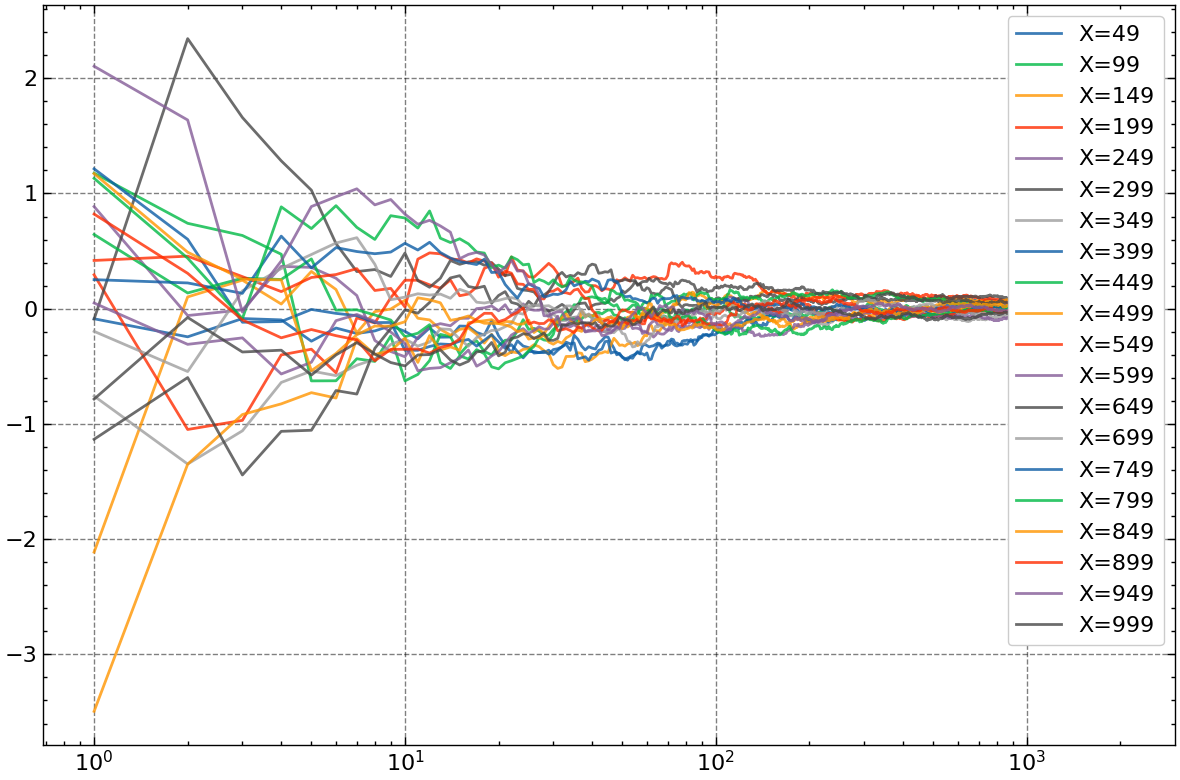

In [81]:
number_of_samples = np.arange(1, 2**11 + 1);
res_s = np.cumsum(samples, axis=1) / number_of_samples

fig, ax = plt.subplots()
for x in range(49, 1000, 50):
    ax.plot(number_of_samples, res_s[x], alpha=0.8, label=f'X={x}')

ax.set_xscale('log')
ax.legend(loc='upper right')

fig.tight_layout()

<font color="blue"> **Q. Make a figure with normalized histograms of $S_t$ for $t \in \{8, 32, 128, 512\}$. (Each histogramcontains $X = 1000$ running averages.).**</font>

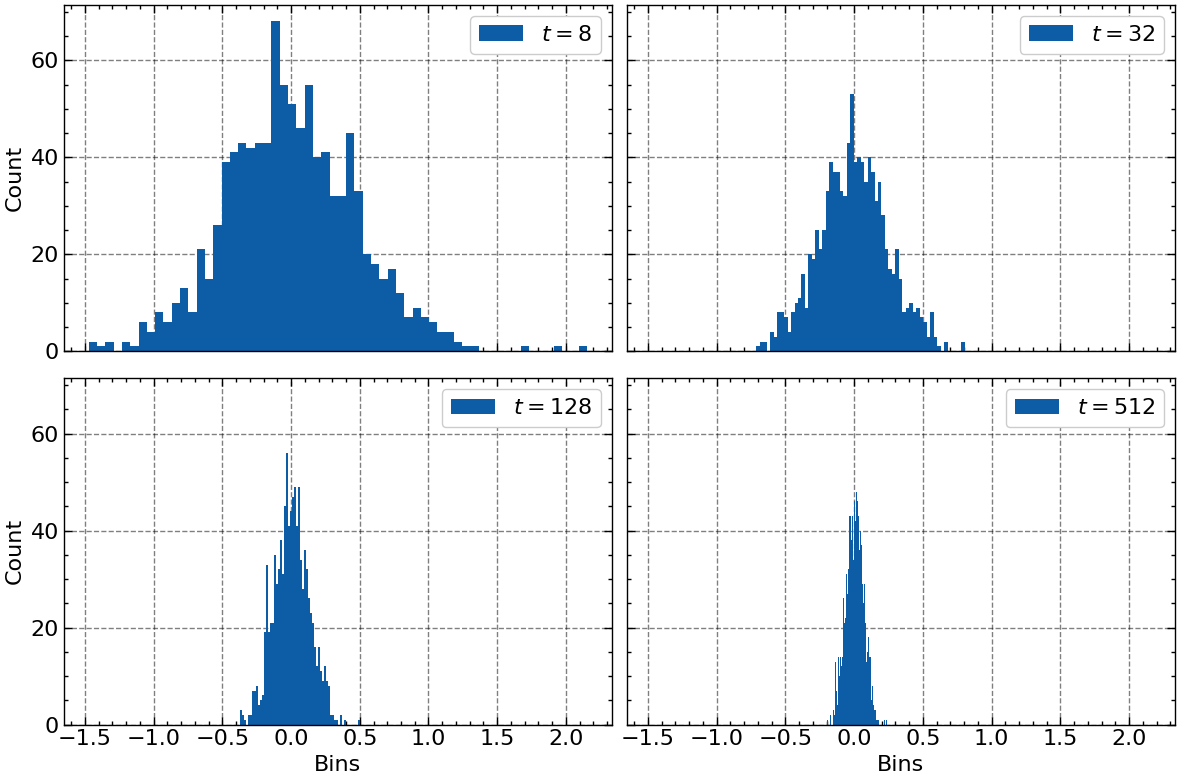

In [82]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
for idx, t in enumerate([8, 32, 128, 512]):
    ax[idx // 2, idx % 2].hist(res_s[:, t-1], bins=60, label=f'$t={t}$')
    ax[idx // 2, idx % 2].legend()

    if idx // 2 == 1:
        ax[idx // 2, idx % 2].set_xlabel('Bins')
    if idx % 2 == 0:
        ax[idx // 2, idx % 2].set_ylabel('Count')

fig.tight_layout()

<font color="blue"> **Q. Plot the estimated uncertainty of $S_t$ as a function of $t$ on a log-log plot. Describe what you see and explain how it is related to the CLT**</font>

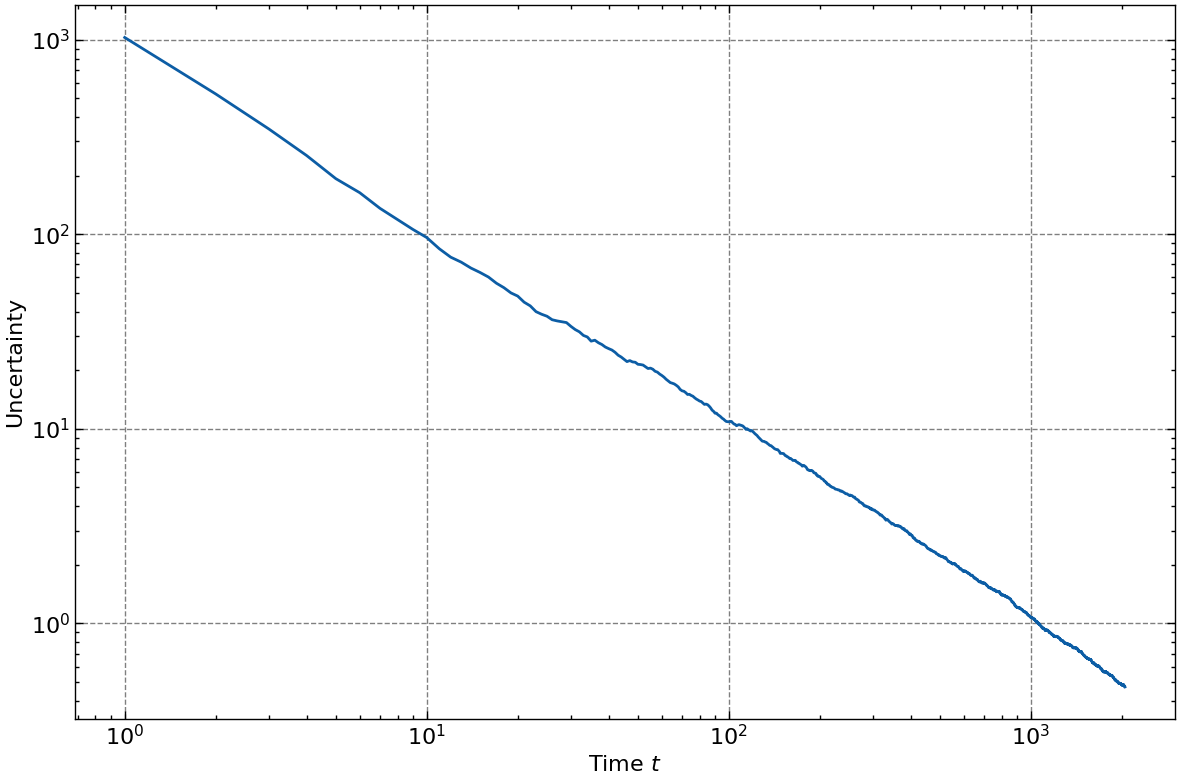

In [83]:
final_s = res_s.mean()
uncertainties = np.cumsum((res_s - final_s)**2, axis=0).sum(axis=0) / 999

fig, ax = plt.subplots()
ax.loglog(number_of_samples, uncertainties)

ax.set_xlabel('Time $t$')
ax.set_ylabel('Uncertainty')

fig.tight_layout()

## 3.3 A Long-Tailed Distribution

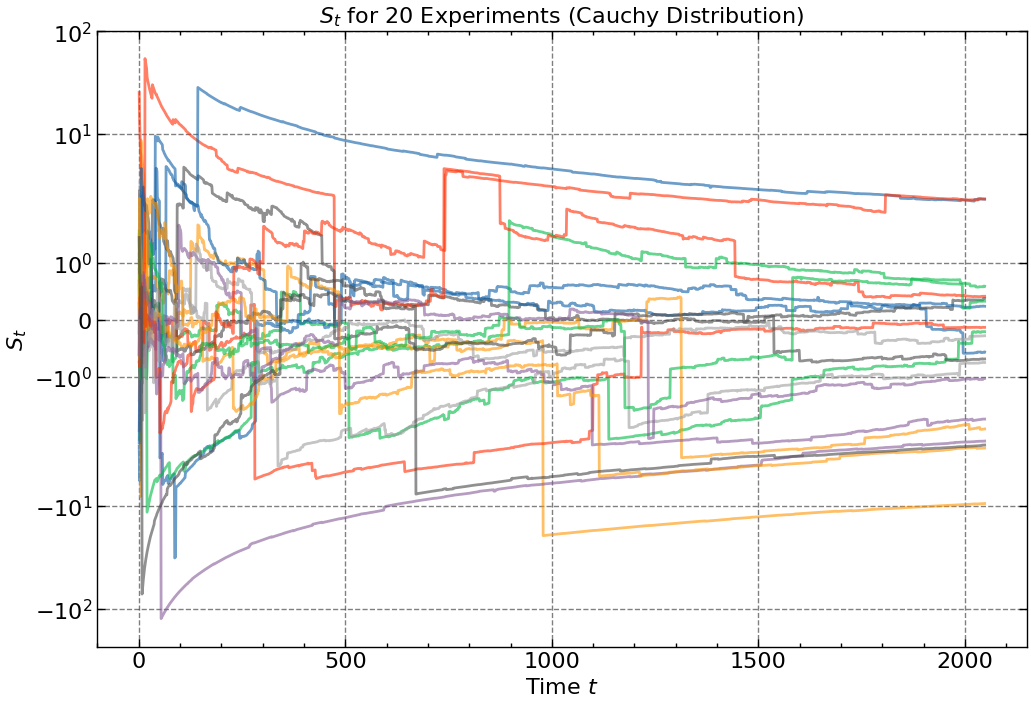

In [84]:
X=1000 #N of Exp
T=2**11 #N of iid

#C_{0,1}
samples = rng.standard_cauchy(size=(X, T))
# print(len(samples))
S_t_all = np.cumsum(samples, axis=1) / np.arange(1, T + 1)

plt.figure(figsize=(12, 8))

for i in range(20):
    plt.plot(np.arange(1, T + 1),S_t_all[i], alpha=0.6)
plt.title('$S_t$ for 20 Experiments (Cauchy Distribution)')
plt.xlabel('Time $t$')
plt.ylabel('$S_t$')
plt.yscale('symlog')  # Symmetrical log scale for extreme values
plt.show()

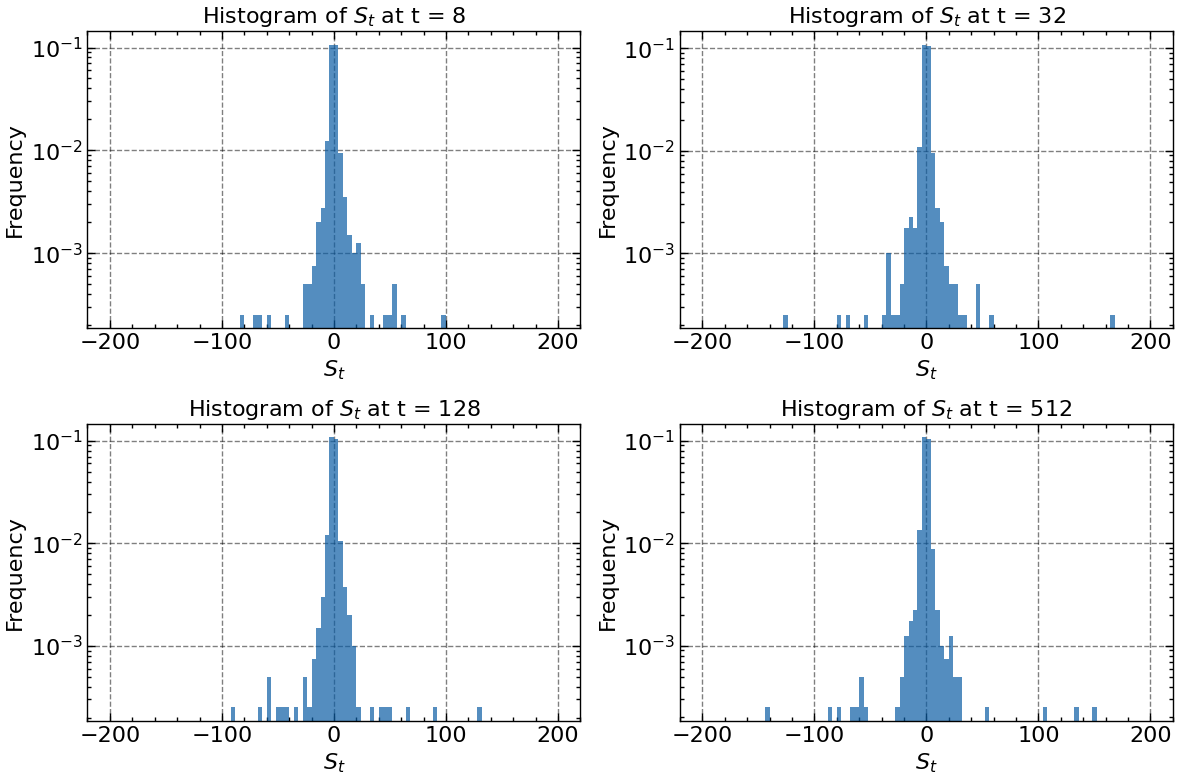

In [85]:
#draw the normalised histogram of St

times = [8, 32, 128, 512]
plt.figure(figsize=(12, 8))
for idx, t in enumerate(times):
    plt.subplot(2, 2, idx + 1)
    plt.hist(S_t_all[:, t-1], bins=100, density=True, range=(-200,200), alpha=0.7)
    plt.title(f'Histogram of $S_t$ at t = {t}')
    plt.xlabel('$S_t$')
    plt.ylabel('Frequency')
    plt.yscale('log')  # Log scale for better visibility
plt.tight_layout()
plt.show()

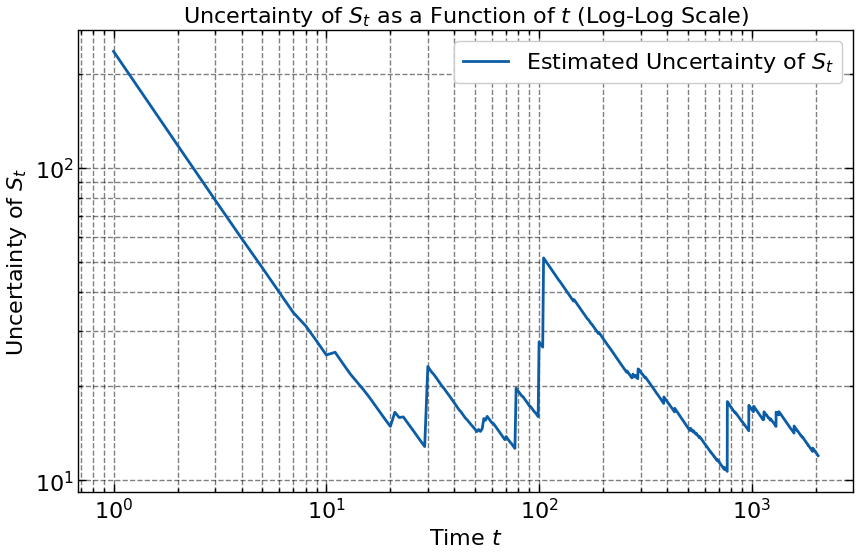

In [86]:
#extimated uncertainty of St
# uncertainty = np.std(S_t_all, axis=0)
uncertainties=[]
for i in range(T):
    uncertainties.append(np.std(S_t_all[:, i],axis=0)) #calculate uncertainties of S_t for all t

plt.figure(figsize=(10, 6))
plt.loglog(np.arange(1, T + 1), uncertainties, label='Estimated Uncertainty of $S_t$')
plt.xlabel('Time $t$')
plt.ylabel('Uncertainty of $S_t$')
plt.title('Uncertainty of $S_t$ as a Function of $t$ (Log-Log Scale)')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()